In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv("../data/raw/train.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# convert int64 to int32
for i in df.columns:
    if df[i].dtype == "int64":
        df[i]= df[i].astype('int32')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 66.3+ KB


In [16]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S


Age

In [18]:

df["Age"].isnull().sum()


177

In [32]:
#max
df["Age"].max()

80.0

In [33]:
# min
df["Age"].min()

0.42

In [34]:
# mean
df["Age"].mean()

29.69911764705882

[]

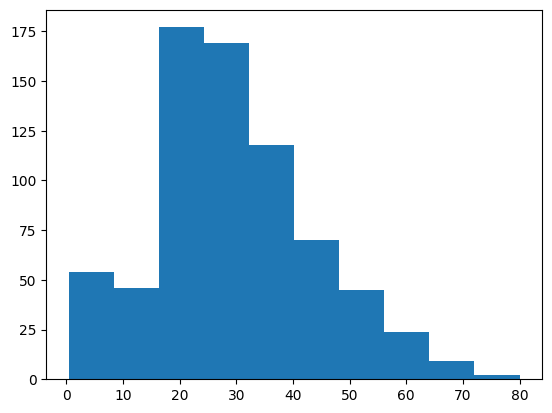

In [20]:
# hist plot
plt.hist(x=df["Age"],bins=10)
plt.plot()

Pclass

In [21]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
df["Pclass"].isnull().sum()

0

[]

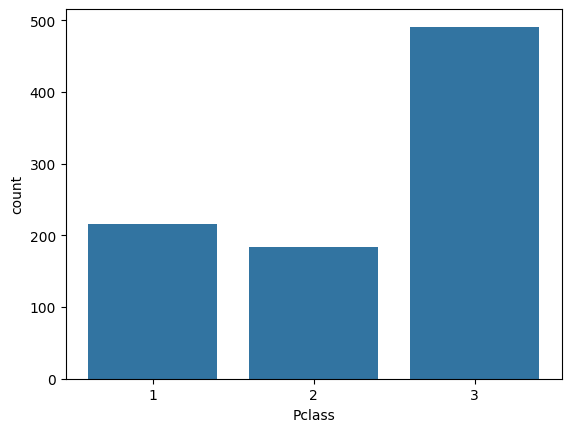

In [27]:
# count plot
sns.countplot(df, x="Pclass")
plt.plot()

Sex

In [28]:
df["Sex"].isnull().sum()

0

In [29]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

[]

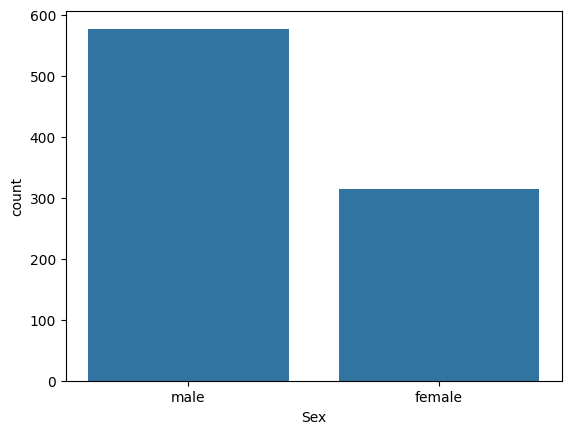

In [30]:
# count plot
sns.countplot(df, x="Sex")
plt.plot()

SibSp

In [35]:
df["SibSp"].isnull().sum()

0

In [39]:
a = df["SibSp"].value_counts()

[]

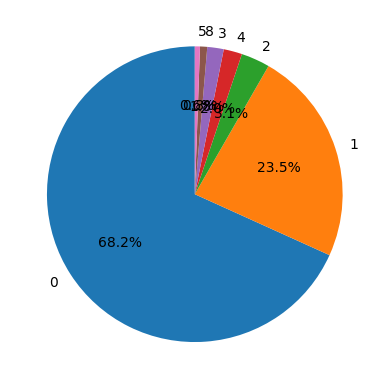

In [40]:
# pie

plt.pie(a.values, labels=a.index, autopct='%1.1f%%', startangle=90)
plt.plot()

Parch

In [42]:
df["Parch"].isnull().sum()

0

In [43]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [44]:
a = df["Parch"].value_counts()

[]

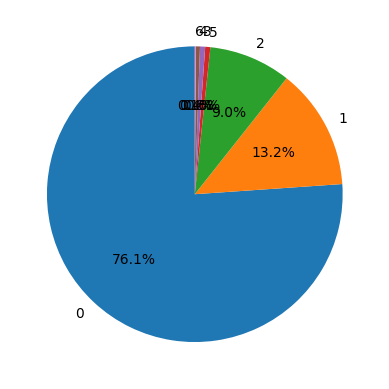

In [45]:
# pie

plt.pie(a.values, labels=a.index, autopct='%1.1f%%', startangle=90)
plt.plot()

Fare

In [47]:
df["Fare"].isnull().sum()

0

In [48]:
# max
df["Fare"].max()

512.3292

In [50]:
# mean
df["Fare"].mean()

32.204207968574636

In [49]:
# min
df["Fare"].min()

0.0

In [55]:
# make a new column

df["indivisual_fare"] = df["Fare"]/(df["Parch"]+df["SibSp"]+1)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisual_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


Cabin

In [58]:
df["Cabin"].isnull().sum()

687

In [59]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

EDA

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisual_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


In [84]:
Pclass = df.groupby("Pclass")

In [85]:
b = Pclass["Survived"].sum()
b

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int32

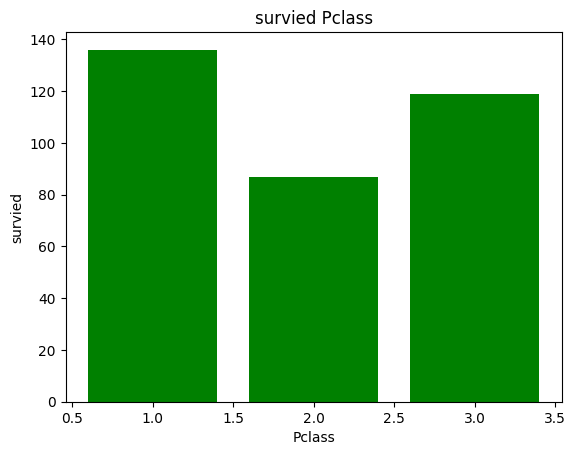

In [86]:
# bar graph

fig = plt.figure()
 
# creating the bar plot
plt.bar(b.index,b.values, color ='green', 
)
 
plt.xlabel("Pclass")
plt.ylabel("survied")
plt.title("survied Pclass")
plt.show()

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisual_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


In [91]:
Sex = df.groupby("Sex")

[]

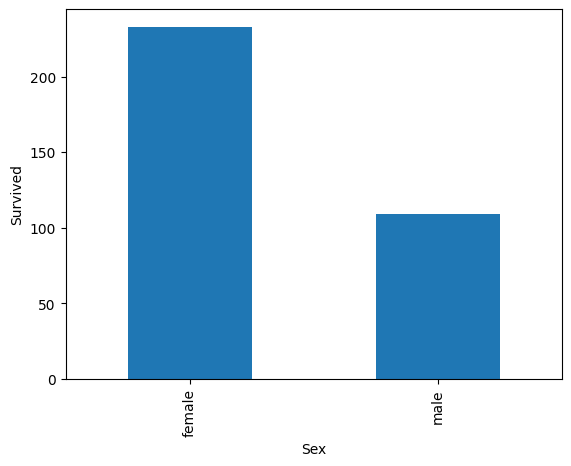

In [95]:
# barplot
Sex["Survived"].sum().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.plot()

In [101]:
df["total_member"]=df["SibSp"]+df["Parch"]

In [103]:
def family(data):
  if data == 1:
    return 'alone'
  elif data>1 and data <5:
    return "small"
  else:
    return "large"

In [104]:
df["family_size"]=df["total_member"].apply(family)

In [105]:
df["Cabin"]=df["Cabin"].str[0]  

In [106]:
df.drop(columns=["PassengerId","Name","SibSp","Parch","total_member","Ticket","Fare"],inplace = True)

In [111]:
x=df[["Pclass","Sex","Age","Cabin","Embarked","family_size","indivisual_fare"]]
y=df["Survived"]

In [112]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1000, stratify=y)

In [120]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['Pclass', 'Age', "indivisual_fare"]
categorical_features = ['Sex', 'Cabin', 'Embarked', 'family_size']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Use mean imputation for numeric features
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most frequent imputation for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the final pipeline with the preprocessing steps and classifier
clf = RandomForestClassifier(n_estimators=150,criterion="gini",random_state=100,max_features='log2',warm_start=True,min_samples_split=2,min_samples_leaf= 4,max_leaf_nodes= 15,max_depth=10 )

pipe = make_pipeline(preprocessor, clf)

In [121]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age',
                                                   'indivisual_fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Cabin', 'Embarked',
                                                   'family_size'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features='log2',
                                        max_leaf_nodes=15, min_samples_leaf=4,
                                        n_estimators=150, random_state=100,
                                        warm_start=True))])

In [122]:
y_pred=pipe.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)

In [127]:
accuracy_score 

0.7821229050279329